In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import svm
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
import scipy
from sklearn.manifold import TSNE
import seaborn as sn
from sklearn.datasets import make_friedman1
from sklearn.decomposition import SparsePCA
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
AAPL_df = pd.read_csv('Q3/AAPL_n.csv')
AAPL_df.head(2)

,Unnamed: 0,Date,marketAverage,marketChangeOverTime,marketClose,marketHigh,marketLow,marketNotional,marketNumberOfTrades,marketOpen,marketVolume
0,0,2/1/2019 9:30,167.058,0.000000,167.150,167.55,166.67,1.319461e+08,1766,166.93,789821
1,1,2/1/2019 9:31,167.182,0.000742,167.175,167.42,166.80,2.853055e+07,1143,167.21,170656


In [3]:
data = AAPL_df

In [4]:
data["return"] = data["marketClose"] - data["marketOpen"]
data.head(1)

,Unnamed: 0,Date,marketAverage,marketChangeOverTime,marketClose,marketHigh,marketLow,marketNotional,marketNumberOfTrades,marketOpen,marketVolume,return
0,0,2/1/2019 9:30,167.058,0.0,167.15,167.55,166.67,131946145.0,1766,166.93,789821,0.22


In [5]:
data['10MA'] = data.marketHigh.rolling(window=10).mean()
data = data.dropna()
data.head(2)

,Unnamed: 0,Date,marketAverage,marketChangeOverTime,marketClose,marketHigh,marketLow,marketNotional,marketNumberOfTrades,marketOpen,marketVolume,return,10MA
9,9,2/1/2019 9:39,167.305,0.001479,167.40,167.4,167.183,15139397.44,713,167.29,90490,0.11,167.317
10,10,2/1/2019 9:40,167.664,0.003627,167.79,167.8,167.410,34258865.56,1340,167.41,204330,0.38,167.342


In [6]:
data['20MA'] = data.marketHigh.rolling(window=20).mean()
data = data.dropna()
data.head(2)

<ipython-input-6-7cd87c98819d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['20MA'] = data.marketHigh.rolling(window=20).mean()


,Unnamed: 0,Date,marketAverage,marketChangeOverTime,marketClose,marketHigh,marketLow,marketNotional,marketNumberOfTrades,marketOpen,marketVolume,return,10MA,20MA
28,28,2/1/2019 9:58,167.259,0.001203,167.19,167.391,167.18,16151201.41,659,167.246,96564,-0.056,167.4058,167.6587
29,29,2/1/2019 9:59,167.077,0.000114,167.11,167.328,167.00,22213161.16,875,167.198,132952,-0.088,167.3876,167.6551


In [7]:
data['40MA'] = data.marketHigh.rolling(window=40).mean()
data = data.dropna()
data.head(2)

,Unnamed: 0,Date,marketAverage,marketChangeOverTime,marketClose,marketHigh,marketLow,marketNotional,marketNumberOfTrades,marketOpen,marketVolume,return,10MA,20MA,40MA
67,67,2/1/2019 10:37,168.613,0.009308,168.70,168.70,168.499,13183703.12,541,168.53,78189,0.17,168.6092,168.6935,168.423100
68,68,2/1/2019 10:38,168.727,0.009991,168.78,168.78,168.660,18976604.98,687,168.70,112469,0.08,168.6132,168.6990,168.457825


In [8]:
data["kurt"] = data.kurtosis(axis = 1, skipna = True)
data = data.dropna()
data["skew"] = data.skew(axis = 1, skipna = True)
data.head(2)

,Unnamed: 0,Date,marketAverage,marketChangeOverTime,marketClose,marketHigh,marketLow,marketNotional,marketNumberOfTrades,marketOpen,marketVolume,return,10MA,20MA,40MA,kurt,skew
67,67,2/1/2019 10:37,168.613,0.009308,168.70,168.70,168.499,13183703.12,541,168.53,78189,0.17,168.6092,168.6935,168.423100,13.998779,3.87275
68,68,2/1/2019 10:38,168.727,0.009991,168.78,168.78,168.660,18976604.98,687,168.70,112469,0.08,168.6132,168.6990,168.457825,13.998779,3.87275


In [9]:
dt1 = data
dt1["Up"] = np.where(dt1["return"]>0,1,0)
dt1["Down"] = np.where(dt1["return"]<0,1,0)
dt1["UpDown"] = np.where(dt1["return"]>0,"Up","Down")
dt1.head(2)

,Unnamed: 0,Date,marketAverage,marketChangeOverTime,marketClose,marketHigh,marketLow,marketNotional,marketNumberOfTrades,marketOpen,marketVolume,return,10MA,20MA,40MA,kurt,skew,Up,Down,UpDown
67,67,2/1/2019 10:37,168.613,0.009308,168.70,168.70,168.499,13183703.12,541,168.53,78189,0.17,168.6092,168.6935,168.423100,13.998779,3.87275,1,0,Up
68,68,2/1/2019 10:38,168.727,0.009991,168.78,168.78,168.660,18976604.98,687,168.70,112469,0.08,168.6132,168.6990,168.457825,13.998779,3.87275,1,0,Up


C:\Users\chsha\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


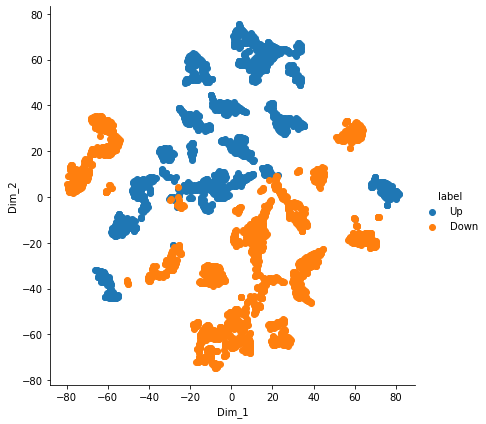

In [10]:

l = dt1.UpDown
xt = dt1.drop(['Date'], axis = 1)
xt = xt.drop(['UpDown'], axis = 1)

s_data = StandardScaler().fit_transform(xt)

model = TSNE(n_components = 2 , perplexity=40.0, random_state = 0)

tsne_data = model.fit_transform(s_data)

tsne_data = np.vstack((tsne_data.T, l)).T

tsne_df = pd.DataFrame(data = tsne_data,columns =("Dim_1", "Dim_2", "label"))
 
# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue ="label", size = 6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
 
plt.show()


C:\Users\chsha\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(
C:\Users\chsha\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


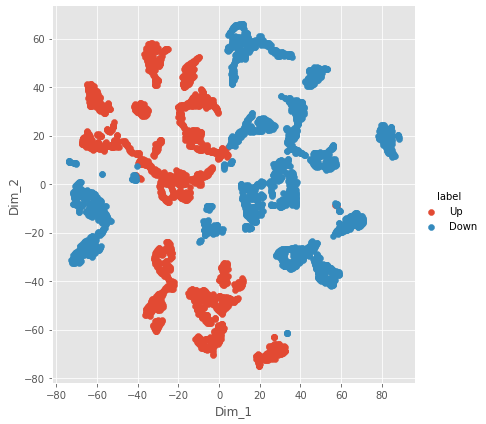

In [194]:

l = dt1.UpDown
xt = dt1.drop(['Date'], axis = 1)
xt = xt.drop(['UpDown'], axis = 1)

s_data = StandardScaler().fit_transform(xt)

model = TSNE(n_components = 2 , perplexity=40.0, random_state = 0 , metric='cosine')

tsne_data = model.fit_transform(s_data)

tsne_data = np.vstack((tsne_data.T, l)).T

tsne_df = pd.DataFrame(data = tsne_data,columns =("Dim_1", "Dim_2", "label"))
 
# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue ="label", size = 6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
 
plt.show()


C:\Users\chsha\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(
C:\Users\chsha\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


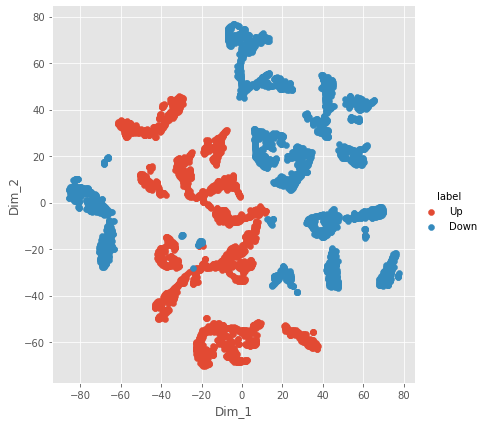

In [198]:

l = dt1.UpDown
xt = dt1.drop(['Date'], axis = 1)
xt = xt.drop(['UpDown'], axis = 1)

s_data = StandardScaler().fit_transform(xt)

model = TSNE(n_components = 2 , perplexity=40.0, random_state = 0 , metric='correlation')

tsne_data = model.fit_transform(s_data)

tsne_data = np.vstack((tsne_data.T, l)).T

tsne_df = pd.DataFrame(data = tsne_data,columns =("Dim_1", "Dim_2", "label"))
 
# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue ="label", size = 6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
 
plt.show()


In [18]:
data.head(1)

,Unnamed: 0,Date,marketAverage,marketChangeOverTime,marketClose,marketHigh,marketLow,marketNotional,marketNumberOfTrades,marketOpen,marketVolume,return,10MA,20MA,40MA,kurt,skew,Up,Down,UpDown
67,67,2/1/2019 10:37,168.613,0.009308,168.7,168.7,168.499,13183703.12,541,168.53,78189,0.17,168.6092,168.6935,168.4231,13.998779,3.87275,Up,0,Up


In [19]:
def imp(data) :
    
    d = data
    
    data = data.drop(['Date'], axis = 1)
    data = data.drop(['UpDown'], axis = 1)
    data = data.drop(['Up'], axis = 1)
    
    n,pca = doPCA(data)
    PC = pca.components_
    PC_df = pd.DataFrame(data=PC, index = data.columns)
    PC_dim = PC_df
    
    weight = pca.explained_variance_ratio_
    #print(weight)
    
    PC_dim["Feature Importance "] = (PC_dim**2).apply(lambda x : np.sqrt(x.dot(weight)), axis = 1 )
    
    PC_dim = PC_dim.round(decimals=2)
    PC_dim = PC_dim.iloc[1: , :]
    
    return PC_dim
    
PC_dim = imp(data)
PC_dim

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,Feature Importance
marketAverage,-0.18,-0.03,0.03,-0.04,-0.02,-0.05,0.59,0.51,-0.03,0.59,-0.03,-0.03,-0.03,-0.04,0.05,0.06,0.01,0.19
marketChangeOverTime,-0.12,0.02,-0.24,-0.62,0.03,0.00,-0.04,-0.03,0.02,-0.04,-0.67,0.03,0.04,0.04,0.12,0.12,0.24,0.21
marketClose,0.62,0.09,-0.38,-0.04,0.09,0.10,0.16,0.01,0.09,0.15,-0.08,0.09,0.10,0.10,-0.41,-0.43,0.01,0.44
marketHigh,-0.22,0.07,0.59,-0.03,0.07,0.06,-0.01,0.00,0.08,-0.01,-0.06,0.07,0.06,0.04,-0.36,-0.36,0.56,0.26
marketLow,-0.21,0.06,0.31,-0.20,0.06,0.06,-0.00,-0.02,0.05,-0.00,-0.23,0.05,0.05,0.05,-0.23,-0.23,-0.79,0.19
marketNotional,0.67,-0.04,0.59,-0.15,-0.05,-0.06,0.08,-0.09,-0.05,0.08,-0.15,-0.06,-0.07,-0.09,0.24,0.22,-0.03,0.50
marketNumberOfTrades,-0.16,0.00,-0.04,0.03,-0.01,0.02,0.34,-0.86,0.00,0.34,0.03,-0.01,-0.00,0.01,0.02,0.01,0.02,0.19
marketOpen,0.01,0.10,0.00,0.04,0.13,-0.93,-0.00,-0.02,0.12,-0.00,-0.00,0.15,0.17,0.19,-0.01,-0.01,-0.01,0.22
marketVolume,-0.02,0.35,-0.05,0.06,0.42,-0.07,-0.00,-0.02,0.33,-0.01,-0.06,-0.02,-0.34,-0.68,0.01,-0.02,-0.00,0.18
return,-0.00,0.10,0.01,0.01,0.36,-0.00,-0.00,0.01,0.06,-0.01,-0.01,-0.65,-0.40,0.52,-0.00,0.00,0.01,0.10


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def doPCA(data):
  
  norm = StandardScaler().fit_transform(data)
  pca = PCA()
  newdata = pca.fit_transform(norm)
  return newdata,pca

#a,b = doPCA(SP_df)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def doSPCA(data):

  norm = StandardScaler().fit_transform(data)
  spca = SparsePCA(n_components=3, random_state=123)
  pc = spca.fit_transform(norm) 
  n = spca.transform(norm)
  return n,pc

#n,pc = doSPCA(SP_df)

In [ ]:
def doTSNE(data,k):

    l = data.index
    s_data = StandardScaler().fit_transform(data)

    model = TSNE(n_components = 3 , perplexity=k, random_state = 0)

    tsne_data = model.fit_transform(s_data)

    #tsne_data = np.vstack((tsne_data.T, l)).T
    
    return tsne_data


In [12]:
dt1 = data

,Unnamed: 0,Date,marketAverage,marketChangeOverTime,marketClose,marketHigh,marketLow,marketNotional,marketNumberOfTrades,marketOpen,marketVolume,return,10MA,kurt,skew,Up,Down
9,9,2/1/2019 9:39,167.305,0.001479,167.40,167.4,167.183,15139397.44,713,167.29,90490,0.11,167.317,11.998896,3.605326,1,0
10,10,2/1/2019 9:40,167.664,0.003627,167.79,167.8,167.410,34258865.56,1340,167.41,204330,0.38,167.342,11.998899,3.605326,1,0


In [13]:
dt1["Up"] = np.where(dt1["return"]>0,"Up","Down")
dt1.head(2)

,Unnamed: 0,Date,marketAverage,marketChangeOverTime,marketClose,marketHigh,marketLow,marketNotional,marketNumberOfTrades,marketOpen,marketVolume,return,10MA,20MA,40MA,kurt,skew,Up,Down,UpDown
67,67,2/1/2019 10:37,168.613,0.009308,168.70,168.70,168.499,13183703.12,541,168.53,78189,0.17,168.6092,168.6935,168.423100,13.998779,3.87275,Up,0,Up
68,68,2/1/2019 10:38,168.727,0.009991,168.78,168.78,168.660,18976604.98,687,168.70,112469,0.08,168.6132,168.6990,168.457825,13.998779,3.87275,Up,0,Up


In [ ]:
def DD(data):
    
    
    d = data
    data = data.drop(['Date'], axis = 1)
    #data = data.drop(['Up'], axis = 1)
    
    
    n,pca = doPCA(data)
    PC = pca.components_
    PC_df = pd.DataFrame(data=PC, index = data.columns)

    plt.style.use('ggplot')
    fig=plt.figure(figsize=(8,8))

    for i in range(len(n)):
        plt.scatter(n[i,0],n[i,1], c = 'y')

    sc = 10
    for k in range(PC_df.shape[1]):
        plt.text(  PC_df.iloc[k,0]*sc + .05  ,  PC_df.iloc[k,1]*sc + .05 , d.Date[k] , c= 'r')
        plt.arrow( 0,0,  PC_df.iloc[k,0]*sc + .05  ,  PC_df.iloc[k,1]*sc + .05   , color= 'k')
    
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()
    
DD(dt1)

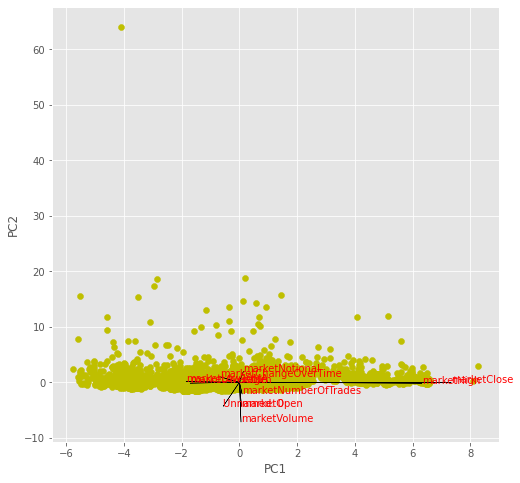

In [125]:
s sn

In [128]:
data.head(1)

,Unnamed: 0,Date,marketAverage,marketChangeOverTime,marketClose,marketHigh,marketLow,marketNotional,marketNumberOfTrades,marketOpen,marketVolume,return,10MA,kurt,skew,Up,Down
9,9,2/1/2019 9:39,167.305,0.001479,167.4,167.4,167.183,15139397.44,713,167.29,90490,0.11,167.317,11.998896,3.605326,Up,0


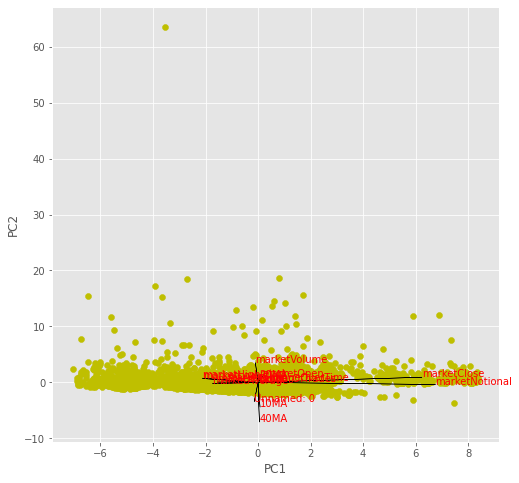

In [21]:
def DD(data):
    
    data = data.dropna()
    
    d = data
    
    data = data.drop(['Date'], axis = 1)
    data = data.drop(['UpDown'], axis = 1)
    data = data.drop(['Up'], axis = 1)
    
    
    
    n,pca = doPCA(data)
    PC = pca.components_
    PC_df = pd.DataFrame(data=PC, index = data.columns)

    plt.style.use('ggplot')
    fig=plt.figure(figsize=(8,8))

    for i in range(len(n)):
        plt.scatter(n[i,0],n[i,1], c = 'y')

    sc = 10
    for k in range(PC_df.shape[1]):
        plt.text(  PC_df.iloc[k,0]*sc + .05  ,  PC_df.iloc[k,1]*sc + .05 , PC_df.index[k] , c= 'r')
        plt.arrow( 0,0,  PC_df.iloc[k,0]*sc + .05  ,  PC_df.iloc[k,1]*sc + .05   , color= 'k')
    
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()
    
DD(data)